# **part 1**
# Discrete Hopfield Network: 
**It is a fully interconnected neural network where each unit is connected to every other unit. It behaves in a discrete manner, i.e. it gives finite distinct output, generally of two types**: 

1. Binary (0/1)
2. Bipolar (-1/1)

**The weights associated with this network is symmetric in nature and has the following properties.** 
1. w(ij) = w(ji) 
2. w(ii) = 0  

# Structure & Architecture  

1. **Each neuron has an inverting and a non-inverting output.**
2. **Being fully connected, the output of each neuron is an input to all other neurons but not self.**

# Training Algorithm

**For storing a set of input patterns S(p) [p = 1 to P], where S(p) = S1(p) … Si(p) … Sn(p), the weight matrix is given by:**

**Case 1 − Binary input patterns:**

For a set of binary patterns sp, p = 1 to P

Here, sp = s1p, s2p,..., sip,..., snp

Weight Matrix is given by

          w(ij) = ∑ [2si(p)−1][2sj(p)−1]          fori≠j

**Case 2 − Bipolar input patterns:**

For a set of binary patterns sp, p = 1 to P

Here, sp = s1p, s2p,..., sip,..., snp

Weight Matrix is given by

         w(ij) = ∑ [si(p)][sj(p)]                 fori≠j

          



In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# part 2

**Reading images and changing size to 64*64**

In [3]:
Test_1 = Image.open(r"/content/gdrive/MyDrive/test1.png").convert(mode="L").resize(size =(64,64))
Test_2 = Image.open(r"/content/gdrive/MyDrive/test2.png").convert(mode="L").resize(size =(64,64))
Test_3 = Image.open(r"/content/gdrive/MyDrive/test3.png").convert(mode="L").resize(size =(64,64))
Train = Image.open(r"/content/gdrive/MyDrive/train.jpg").convert(mode="L").resize(size =(64,64))

**bipolar function**

In [4]:
def bipolar(image):
  threshold = 120
  image_array = np.asarray(image,dtype=np.uint8)
  x = np.zeros(image_array.shape,dtype=np.float)
  x[image_array > threshold] = 1
  x[image_array < threshold] = -1
  return x

In [5]:
X_train =  bipolar(Train)
X_test_1 = bipolar(Test_1)
X_test_2 = bipolar(Test_2)
X_test_3 = bipolar(Test_3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


**plotting train and test images in bipolar form**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


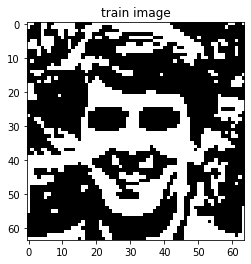

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


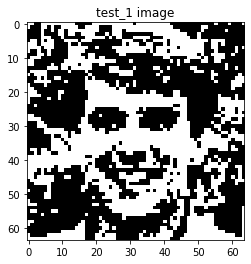

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


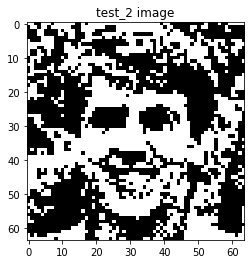

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


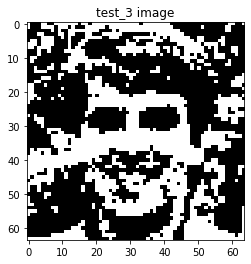

In [6]:
plt.imshow(np.repeat(X_train[:,:,np.newaxis], repeats=3, axis=2))
plt.title("train image")
plt.show()
plt.imshow(np.repeat(X_test_1[:,:,np.newaxis], repeats=3, axis=2))
plt.title("test_1 image")
plt.show()
plt.imshow(np.repeat(X_test_2[:,:,np.newaxis], repeats=3, axis=2))
plt.title("test_2 image")
plt.show()
plt.imshow(np.repeat(X_test_3[:,:,np.newaxis], repeats=3, axis=2))
plt.title("test_3 image")
plt.show()

In [7]:
class DiscreteHopfieldNet():

      def __init__(self):
        self.weight = None

      def train(self,data):
        a = data[0]
        a = np.expand_dims(a, 1)
        self.weight = np.matmul(a, a.T)
        for i in range(len(a)):
            self.weight[i][i] = 0
      
      
      def Activation(self,yi, theta=0):
           if yi > theta:
             return 1
           else:
             return -1

      def predict(self, input_image, weights):
        history = np.zeros((input_image.shape[0]))
        y = input_image
        iter_times = 50
        random_indices = np.random.permutation(np.arange(len(input_image)))
        for i in range(iter_times):
           for index in random_indices:
              y[index] = y[index] + np.dot(y, weights[index])
              y[index] = self.Activation(y[index])
        history = y
        return history


# part 3

**Matrix of weights**

In [8]:
model = DiscreteHopfieldNet()

In [9]:
model.train([X_train.reshape(-1)])
weights = model.weight
weights

array([[ 0.,  1., -1., ...,  1.,  1.,  1.],
       [ 1.,  0., -1., ...,  1.,  1.,  1.],
       [-1., -1.,  0., ..., -1., -1., -1.],
       ...,
       [ 1.,  1., -1., ...,  0.,  1.,  1.],
       [ 1.,  1., -1., ...,  1.,  0.,  1.],
       [ 1.,  1., -1., ...,  1.,  1.,  0.]])

# part 4

**predict function evaluation**



In [10]:
pred_X_train =  model.predict(X_train.reshape(-1), weights)
pred_X_test_1 = model.predict(X_test_1.reshape(-1), weights)
pred_X_test_2 = model.predict(X_test_2.reshape(-1), weights)
pred_X_test_3 = model.predict(X_test_3.reshape(-1), weights)

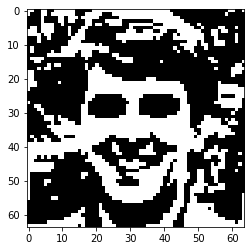

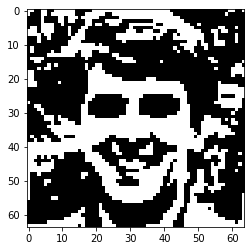

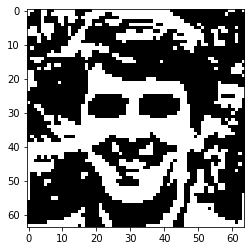

In [11]:
plt.imshow(pred_X_test_1.reshape(64, 64), cmap=plt.cm.gray)
plt.show()
plt.imshow(pred_X_test_2.reshape(64, 64), cmap=plt.cm.gray)
plt.show()
plt.imshow(pred_X_test_3.reshape(64, 64), cmap=plt.cm.gray)
plt.show()

# part 5

In [18]:
def compute_hamming_distance(a, b):
    return len(np.where(a != b)[0])

In [19]:
test1_hamming = compute_hamming_distance(pred_X_test_1, pred_X_train)
test2_hamming = compute_hamming_distance(pred_X_test_2, pred_X_train)
test3_hamming = compute_hamming_distance(pred_X_test_3, pred_X_train)

In [20]:
print(test1_hamming)

print(test2_hamming)

print(test3_hamming)

44
43
33
